# Dark Souls III - Weapons Network Analysis

This project aims to explore the relationships and characteristics of weapons in the popular action role-playing game Dark Souls III. By applying network analysis techniques to a dataset containing information about the weapons in the game, this project seeks to uncover insights about weapon attributes, relationships, and their impact on gameplay.

The goal of this project is to analyze the weapons of the game dark souls 3 and how they relate to each other in terms of STATUS REQUIRED.

A weapon on ds3 usually needs a minimum stat to use effectively. Among the 4 attributes that are: Strength, Dexterity, Intelligence and Faith.

Requirements are often phrased like this, for example:

15/0/0/4

This means that the weapon in question requires 15 strength, 0 dexterity, 0 intelligence, and 4 faith points in order to use it.

With that in mind, I made this project of a directed graph in which each node is a weapon and each edge means that **if it is possible to use the weapon of the source node, then it is possible to use the weapon of the destination node.** This helps to find a good weapon that relates to other weapons that the user might be interested.

## Requirements

In [3]:
pip install pyvis

In [4]:
pip install networkx[default]

## Utilities

In [5]:
def show_graph(net,name):
  net.show(name)
  display(HTML(name))

## Dataset loading and config

In [10]:
import pandas as pd

# DATAFRAME OPTIONS
df = pd.read_csv('DS3_weapon.csv', usecols = ["Name", "Stat Requirements"])
df = df.sample(n=25, random_state=50).reset_index()


#DATAFRAME OPERATIONS
df[['Strength', 'Dexterity', 'Intelligence', 'Faith']] = df['Stat Requirements'].str.split('/', expand=True)
df[['Strength', 'Dexterity', 'Intelligence', 'Faith']] = df[['Strength', 'Dexterity', 'Intelligence', 'Faith']].apply(pd.to_numeric, errors='coerce')


## Making the Graph and visualizing

In [11]:
from pyvis.network import Network
from IPython.core.display import display, HTML
import networkx as nx
import matplotlib.pyplot as plt

nodes = df["Name"].tolist()
edges = []


# Iterate over each pair of weapons and compare their stat requirements
for i in range(len(df)):
    for j in range(i+1, len(df)):
        weapon1 = df.loc[i, 'Name']
        weapon2 = df.loc[j, 'Name']

        comparison = df.loc[i, ['Strength', 'Dexterity', 'Intelligence', 'Faith']] - df.loc[j, ['Strength', 'Dexterity', 'Intelligence', 'Faith']]

        if (comparison >= 0).all():
            edges.append([weapon1,weapon2])


G = nx.DiGraph()
for node in nodes:
  G.add_node(node, label=node)

G.add_edges_from(edges)
net = Network(height='600px', width='80%',heading='', notebook=True, cdn_resources="remote", directed=True)
net.from_nx(G)

#NET OPTIONS
net.toggle_physics(True)
net.show_buttons(filter_=['physics'])
show_graph(net, 'ds3weapons .html')


ds3weapons .html


### Adjanceny Matrix

In [12]:
# Adjanceny Matrix Analysis. G.nodes() is in the same order as the rows on the matrix
print(G.nodes())
print(nx.adjacency_matrix(G).todense())

['Barbed Straight Sword', 'Pontiff Knight Great Scythe', "Sage's Crystal Staff", 'Elkhorn Round Shield', 'Black Knight Greatsword', 'Murky Hand Scythe', 'Rotten Ghru Spear', 'Porcine Shield', 'Immolation Tinder', 'Llewellyn Shield', "Hawkwood's Shield", 'Black Knight Glaive', "Morne's Great Hammer", 'Drakeblood Greatsword', 'Brigand Axe', 'Large Leather Shield', 'Parrying Dagger', 'Storm Curved Sword', 'Black Knight Greataxe', 'Stone Parma', 'Follower Shield', 'Crescent Moon Sword', 'Tailbone Spear', 'Brigand Twindaggers', 'Sunlight Shield']
[[0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 

### Histograma de distribuição empírica de grau.

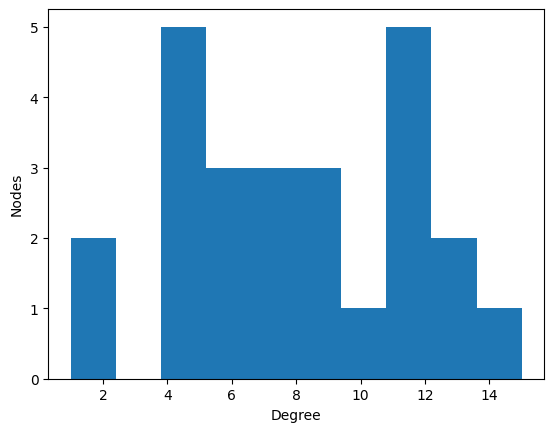

[5, 13, 1, 5, 15, 1, 6, 7, 12, 7, 10, 11, 4, 11, 8, 12, 5, 5, 6, 8, 13, 7, 8, 6, 12]


In [30]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.xlabel("Degree")
    plt.ylabel("Nodes")
    plt.hist(degrees)
    plt.show()
    
    print(degrees)
    
plot_degree_dist(G)

### Diameter


In [24]:
# Calculate the diameter of the weakly connected components
diameters = []
for component in nx.weakly_connected_components(G):
    component_graph = G.subgraph(component)
    try:
        diameter = nx.diameter(component_graph)
        diameters.append(diameter)
    except nx.NetworkXError:
        # Skip the component if infinite path length is encountered
        pass

# Get the maximum diameter value
if diameters:
    print(diameters)
    max_diameter = max(diameters)
    print(f"The diameter of the weakly connected graph is: {max_diameter}")
else:
    print("The graph is not connected.")



The graph is not connected.


### Periferia

In [27]:
# Find the periphery nodes for each weakly connected component
periphery_nodes = []
for component in nx.weakly_connected_components(G):
    component_graph = G.subgraph(component)
    try:
        eccentricities = nx.eccentricity(component_graph)
        max_eccentricity = max(eccentricities.values())
        component_periphery_nodes = [node for node, eccentricity in eccentricities.items() if eccentricity == max_eccentricity]
        periphery_nodes.extend(component_periphery_nodes)
    except nx.NetworkXError:
        # Skip the component if infinite path length is encountered
        pass

print("The periphery nodes are:", periphery_nodes)

The periphery nodes are: []


### Coeﬁciente de clustering global

In [15]:
clustering_coefficient = nx.average_clustering(G)

print("Global clustering coefficient:", clustering_coefficient)

Global clustering coefficient: 0.1834525474525474


### Degree Centrality

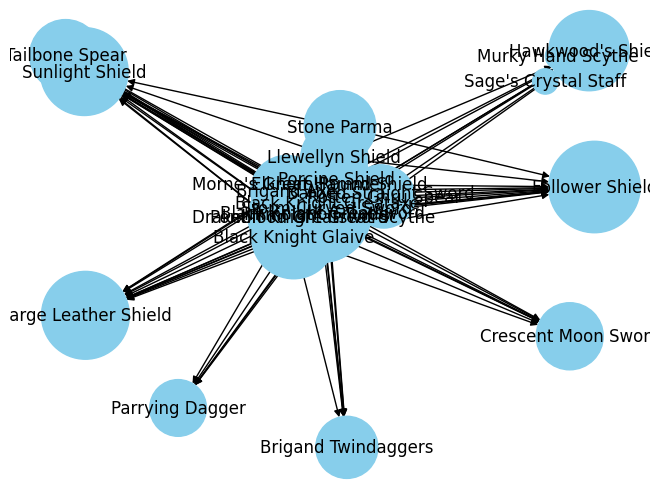

In [ ]:
# Calculate the degree centrality of nodes
degree_centrality = nx.degree_centrality(G)

# Create a list of node sizes based on degree centrality
node_sizes = [8000 * centrality for centrality in degree_centrality.values()]

# Visualize the graph with node sizes based on degree centrality
nx.draw(G, with_labels=True, node_size=node_sizes, node_color='skyblue', font_color='black')

# Display the graph

plt.show()

### Betweenness Centrality

Node Barbed Straight Sword: Betweenness Centrality = 0.0
Node Pontiff Knight Great Scythe: Betweenness Centrality = 0.0
Node Sage's Crystal Staff: Betweenness Centrality = 0.0
Node Elkhorn Round Shield: Betweenness Centrality = 0.0
Node Black Knight Greatsword: Betweenness Centrality = 0.0
Node Murky Hand Scythe: Betweenness Centrality = 0.0
Node Rotten Ghru Spear: Betweenness Centrality = 0.0
Node Porcine Shield: Betweenness Centrality = 0.0
Node Immolation Tinder: Betweenness Centrality = 0.0
Node Llewellyn Shield: Betweenness Centrality = 0.0
Node Hawkwood's Shield: Betweenness Centrality = 0.0
Node Black Knight Glaive: Betweenness Centrality = 0.0
Node Morne's Great Hammer: Betweenness Centrality = 0.0
Node Drakeblood Greatsword: Betweenness Centrality = 0.0
Node Brigand Axe: Betweenness Centrality = 0.0
Node Large Leather Shield: Betweenness Centrality = 0.0
Node Parrying Dagger: Betweenness Centrality = 0.0
Node Storm Curved Sword: Betweenness Centrality = 0.0
Node Black Knight G

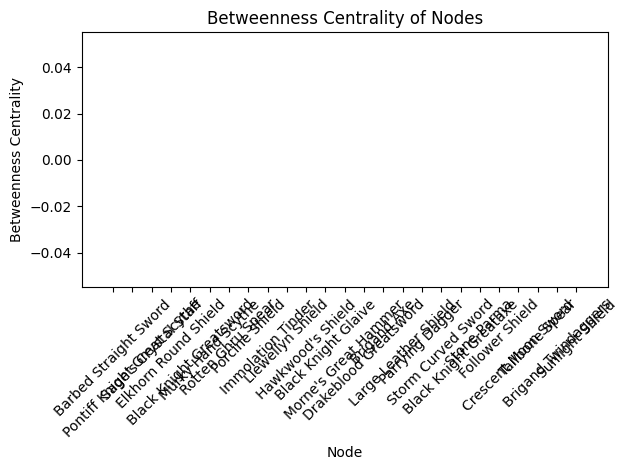

In [ ]:
# Calculate the betweenness centrality of nodes
betweenness_centrality = nx.betweenness_centrality(G)
# Extract node labels and centrality values
labels = list(betweenness_centrality.keys())
centrality_values = list(betweenness_centrality.values())

# Calculate the betweenness centrality of nodes
betweenness_centrality = nx.betweenness_centrality(G)

# Print the betweenness centrality of each node
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: Betweenness Centrality = {centrality}")

# Plot the betweenness centrality
plt.bar(labels, centrality_values)
plt.xlabel('Node')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Componentes Conectados Fortemente

In [31]:
strong_components = list(nx.strongly_connected_components(G))

# Print the strongly connected components
for component in strong_components:
    print(component)

{"Hawkwood's Shield"}
{'Large Leather Shield'}
{'Porcine Shield'}
{'Elkhorn Round Shield'}
{'Follower Shield'}
{'Barbed Straight Sword'}
{'Rotten Ghru Spear'}
{'Sunlight Shield'}
{'Llewellyn Shield'}
{'Brigand Axe'}
{'Parrying Dagger'}
{'Crescent Moon Sword'}
{'Tailbone Spear'}
{'Brigand Twindaggers'}
{'Pontiff Knight Great Scythe'}
{"Sage's Crystal Staff"}
{'Stone Parma'}
{'Drakeblood Greatsword'}
{'Black Knight Glaive'}
{'Black Knight Greatsword'}
{'Murky Hand Scythe'}
{'Immolation Tinder'}
{"Morne's Great Hammer"}
{'Storm Curved Sword'}
{'Black Knight Greataxe'}


### Componentes Conectados Fracamente

In [33]:
weak_components = list(nx.weakly_connected_components(G))

# Print the weakly connected components
for component in weak_components:
    print(component)

{'Brigand Axe', 'Crescent Moon Sword', 'Brigand Twindaggers', 'Porcine Shield', 'Large Leather Shield', 'Stone Parma', 'Llewellyn Shield', 'Follower Shield', 'Drakeblood Greatsword', 'Black Knight Greataxe', 'Barbed Straight Sword', 'Sunlight Shield', 'Black Knight Glaive', 'Storm Curved Sword', 'Tailbone Spear', 'Rotten Ghru Spear', "Hawkwood's Shield", "Sage's Crystal Staff", 'Pontiff Knight Great Scythe', 'Elkhorn Round Shield', 'Parrying Dagger', 'Immolation Tinder', 'Black Knight Greatsword', "Morne's Great Hammer", 'Murky Hand Scythe'}


### Eigenvector centrality

In [41]:
# Calculate the eigenvector centrality
G.remove_edges_from(nx.selfloop_edges(G))
centrality = nx.eigenvector_centrality(G, max_iter=1000)


# Print the eigenvector centrality values
for node, centrality_value in centrality.items():
    print(f"Node {node}: {centrality_value}")


Node Barbed Straight Sword: 1.5879071409080428e-11
Node Pontiff Knight Great Scythe: 1.5879071409080428e-11
Node Sage's Crystal Staff: 1.5879071409080428e-11
Node Elkhorn Round Shield: 2.523184446902869e-08
Node Black Knight Greatsword: 1.5879071409080428e-11
Node Murky Hand Scythe: 1.5879071409080428e-11
Node Rotten Ghru Spear: 2.523184446902869e-08
Node Porcine Shield: 2.0059316352877788e-05
Node Immolation Tinder: 1.5879071409080428e-11
Node Llewellyn Shield: 3.7839827167838613e-08
Node Hawkwood's Shield: 0.005339127665309451
Node Black Knight Glaive: 1.2623861770218916e-08
Node Morne's Great Hammer: 1.5879071409080428e-11
Node Drakeblood Greatsword: 5.036904967245937e-06
Node Brigand Axe: 0.0013398125133334952
Node Large Leather Shield: 0.2729641051553562
Node Parrying Dagger: 0.0013398125133334952
Node Storm Curved Sword: 1.5879071409080428e-11
Node Black Knight Greataxe: 1.5879071409080428e-11
Node Stone Parma: 0.001339825121316193
Node Follower Shield: 0.5339403134011118
Node Cr

### Degree Assortativity

In [42]:
# Assuming you have a graph named G
assortativity = nx.degree_assortativity_coefficient(G)
print("Degree Assortativity Coefficient:", assortativity)

Degree Assortativity Coefficient: -0.4325970556603167
